# SF Salinity gradient plotting of select soil chemical relationships 
Skip data pre-processing for comparison to genomic data, correlation heatmaps.
Emphasized relations are derived from other analyses of metadata (env. chem).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import non-Log data, colors

In [2]:
Soil_chem = pd.read_csv('SF_sal_meta_FIX2.txt', sep='\t')
#Soil_chem.columns

In [3]:
Sal_site_colors = pd.read_csv('Sal_siteColors_test.txt', sep='\t')
Sal_site_colors.columns = ['Location', 'color','Site']
#Sal_site_colors

In [4]:
# Merge with site colors
Soil_chem_colors = pd.merge(Sal_site_colors, Soil_chem, on='Location')      # Log_Soil_chem_colors
pointcolors = Soil_chem_colors['color']                                         # get point colors

In [5]:
# Import Poffenbarger 2011 data from meta-analysis
CH4poff = pd.read_csv('Poffen_CH4_data.txt', sep='\t')
# CH4poff.head()

###  Make subsets for plotting

In [6]:
Soil_chem_colors1 = Soil_chem_colors[Soil_chem_colors.CH4_ug_m2_h > 0]
Soil_chem_colors1.shape

(154, 70)

In [7]:
Ref_chem = Soil_chem_colors1[Soil_chem_colors1.EWcoastGroup == 'SF_Ref']
Rest_chem = Soil_chem_colors1[Soil_chem_colors1.EWcoastGroup == 'SF_Rest']
#pointcolors # = Log_Soil_chem_colors['color'] 

#Plotting colors thrown off by NA values, here for example drop CH4 data NAs
#Ref_chem.dropna(subset = ['CH4_ug_m2_h'], inplace=True)
#Ref_chem['CH4_ug_m2_h']

## Scatterplot function for Rest_Ref shapes

In [8]:
#from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker

In [9]:
# To get color mapped need 'facecolors' = in scatter_kws
sns.set_style("white")
sns.set_style("ticks")

In [10]:
# Plots two scatters (Rest, Ref) on same axis, using color vectors per point
def Rest_ref_scatter(y,x,axis):
    sns.regplot(y=y, x = x, fit_reg=False, marker ='o', data=Ref_chem, ax=axis, 
      scatter_kws={'facecolors':Ref_chem['color'],'alpha':0.5})  
    sns.regplot(y=y, x = x, fit_reg=False, marker ='^', data=Rest_chem, ax=axis, 
      scatter_kws={'facecolors':Rest_chem['color'],'alpha':0.5})
    sns.despine()

## Plot CH4 vs. Salinity

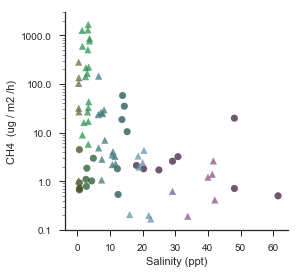

In [11]:
# Here use log Axis!!!
#pp = PdfPages('soil_CH4_test3in.pdf')                # Initialize the pdf file

_, ax = plt.subplots(figsize=(4,4))
ax.set(xscale='linear', yscale='log')

ax.set_yticks([0.1,1,10,100,1000]) #, rotation=90)  # needs work 
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylim(0.1, 3000)

sns.regplot(y='CH4_ug_m2_h', x = 'Salinity.x', fit_reg=False, marker ='o', data=Ref_chem, #_shape, #hue='Location',
      scatter_kws={'facecolors':Ref_chem['color'],'alpha':0.5})

sns.regplot(y='CH4_ug_m2_h', x = 'Salinity.x', fit_reg=False, marker ='^', data=Rest_chem, #_shape, #hue='Location',
      scatter_kws={'facecolors':Rest_chem['color'],'alpha':0.5})

plt.xlabel('Salinity (ppt)')
plt.ylabel('CH4  (ug / m2 /h)')
sns.despine()
#plt.show()

#gs.tight_layout(_)                      # Make tight layout
#pp.savefig()                            # Save the figure PDF created at top, else add file name .pdf  or #plt.show() #('soil_CH4_Sal_corr_test.pdf')
#pp.close() 

### Plot Poffenbarger 2011 data only

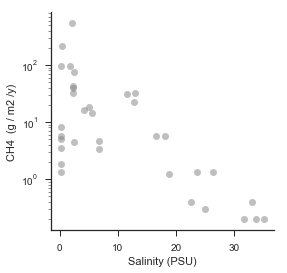

In [12]:
# Plot data
_, ax = plt.subplots(figsize=(4,4))
ax.set(xscale='linear', yscale='log')               # Here use log Axis!!! 
    
sns.regplot(y='CH4g_m2y', x = 'Salinity_ppt', fit_reg=False, marker ='o', data=CH4poff, 
            color="grey", scatter_kws={'alpha':0.5})

plt.xlabel('Salinity (PSU)')
plt.ylabel('CH4  (g / m2 /y)')
sns.despine()

## Plot SF data with Poffenbarger

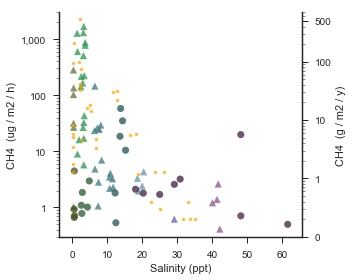

In [13]:
#############################################
# plot on two axes -- using ax2 = ax1.twinx()
##############################################

#pp = PdfPages('CH4_v_Sal_SF_v_Poff.pdf')                                 # Initialize the pdf file
#pp = PdfPages('CH4_v_Sal_SF_NO_Poff.pdf')                               # Initialize the pdf file

fig, ax1 = plt.subplots(figsize=(5,4))

#######################
# First axis, SF CH4
#######################
#ax1 = 
sns.regplot(y='CH4_ug_m2_h', x = 'Salinity.x', fit_reg=False, marker ='^', data=Rest_chem,   # SF_Restored
    scatter_kws={'facecolors':Rest_chem['color'],'alpha':0.5})

sns.regplot(y='CH4_ug_m2_h', x = 'Salinity.x', fit_reg=False, marker ='o', data=Ref_chem,          # SF_Reference
      scatter_kws={'facecolors':Ref_chem['color'],'alpha':0.5})

#sns.regplot(y='SF_CH4m2y', x = 'Salinity.x', fit_reg=False, marker ='x', data=Soil_chem_colors,       # Poff_2011
#            color="black", scatter_kws={'alpha':0.1})

# Axis 1 params 
ax1.set(xscale='linear', yscale='log')                                   # log axis 
ax1.set_ylim(bottom = 0.3, top=3000)                                     # range needed for two axes
#ax1.set_ylabel('CH4  (ug / m2 / h)')                                    # y_label, needs to be after ax2 info...

# relabel ticks -- requires: from matplotlib import ticker
ax1.get_yaxis().set_major_formatter(                                     # not scientific label
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))              # integer format 
plt.yticks([1, 10, 100,1000])                                            # label array


#######################
# 2nd axis, Poff 2011 metanalysis
#######################
ax2 = ax1.twinx()                                                        ### plot 2nd y-axis, copy x-axis ###

ax2 = sns.regplot(y='CH4g_m2y', x = 'Salinity_ppt', fit_reg=False, marker ='.', data=CH4poff,         # Poff_2011
            color="orange", scatter_kws={'alpha':0.7})

# dummy for aligning, data converted by poff method...hidden by alpha = 0
sns.regplot(y='CH4_ug_m2_h', x = 'Salinity.x', fit_reg=False, marker ='x', data=Soil_chem_colors,       # SF / y
            color="black", scatter_kws={'alpha':0})

# axis 2 parameters
ax2.set(xscale='linear', yscale='log')                                   # log y-axis
ax2.set_ylabel('CH4  (g / m2 / y)')                                      # y-axis label
ax2.set_ylim(bottom = 0.3, top=700)       # bottom = 0.35 if ax1 = 0.01  # range needed for two axes

# relabel ticks -- requires: from matplotlib import ticker
ax2.get_yaxis().set_major_formatter(                                     # not scientific label     
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))              # integer format 
plt.yticks([0.1,1,10, 100,500])                                          # label array


###### Clean up ######
ax1.set_ylabel('CH4  (ug / m2 / h)')                                     # y1 label (needs to be at end)
ax1.set_xlabel('Salinity (ppt)')                                         # X-label
sns.despine(top=True, right=False)                                       # remove top box 
fig.tight_layout()                                                       # Make tight layout

# Save the figure PDF created at top 
#pp.savefig()                             
#pp.close()   # Close the file

## Plot selected environment relationships with CH4, soil C

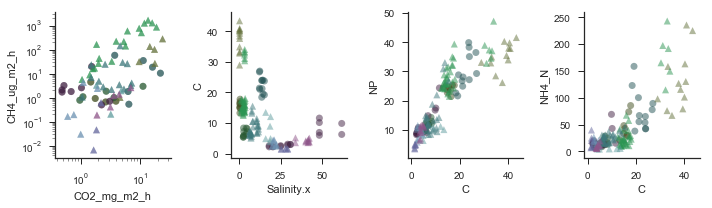

In [14]:
from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages('soil_CH4_Sal_corr_fxn_test4.pdf')                # Initialize the pdf file

# Make 1x3 GRID
fig = plt.figure(figsize=(10, 3))        # Define plot
#fig = plt.figure(figsize=(4.25, 1.5))        # Define plot

gs = gridspec.GridSpec(1, 4)                # Declare grid dimension   
gs.update(left=0, right=1, wspace=0.45)     # Fine tune panel spacing

ax1 = plt.subplot(gs[0, 0])                 # 1st axis
ax2 = plt.subplot(gs[0, 1])                 # 2nd axis
ax3 = plt.subplot(gs[0, 2])                 # 3rd axis
ax4 = plt.subplot(gs[0, 3])                 # 3rd axis


ax1.set(xscale='log', yscale='log')


Rest_ref_scatter('CH4_ug_m2_h','CO2_mg_m2_h',ax1)
Rest_ref_scatter('C','Salinity.x',ax2)
Rest_ref_scatter('NP','C',ax3)
Rest_ref_scatter('NH4_N','C',ax4)


gs.tight_layout(fig)                    # Make tight layout
#pp.savefig()                            # Save the figure PDF created at top, else add file name .pdf  or #plt.show() #('soil_CH4_Sal_corr_test.pdf')
#pp.close()   # Close the file

### Look at log-transformed relationships

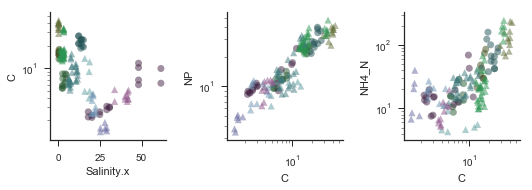

In [15]:
from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages('soil_CH4_Sal_corr_fxn_test5.pdf')                # Initialize the pdf file

# Make 1x3 GRID
fig = plt.figure(figsize=(7.5, 2.75))        # Define plot
gs = gridspec.GridSpec(1, 3)                # Declare grid dimension   
#gs.update(left=0, right=1, wspace=0.45)     # Fine tune panel spacing

ax1 = plt.subplot(gs[0, 0])                 # 1st axis
ax2 = plt.subplot(gs[0, 1])                 # 2nd axis
ax3 = plt.subplot(gs[0, 2])                 # 3rd axis

ax1.set(xscale='linear', yscale='log')
ax2.set(xscale='log', yscale='log')
ax3.set(xscale='log', yscale='log')

Rest_ref_scatter('C','Salinity.x',ax1)
Rest_ref_scatter('NP','C',ax2)

Rest_ref_scatter('NH4_N','C',ax3)

gs.tight_layout(fig)                    # Make tight layout
#pp.savefig()                            # Save the figure PDF created at top, else add file name .pdf  or #plt.show() #('soil_CH4_Sal_corr_test.pdf')
#pp.close()   # Close the file